In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [1]:
import pandas as pd

df = pd.read_csv("nalco_stock.csv")
df.head()


,Date,Open,High,Low,Close,Volume
0,2023-01-02,67.2,68.5,66.8,68.1,3456789
1,2023-01-03,68.0,69.2,67.5,68.9,3678123
2,2023-01-04,68.7,69.0,67.9,68.2,2987456
3,2023-01-05,68.5,70.1,68.3,69.8,4210987
4,2023-01-06,70.0,71.3,69.5,70.9,5123980


In [3]:
df.shape


(10, 6)

In [4]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')

In [5]:
df.info

<bound method DataFrame.info of          Date  Open  High   Low  Close   Volume
0  2023-01-02  67.2  68.5  66.8   68.1  3456789
1  2023-01-03  68.0  69.2  67.5   68.9  3678123
2  2023-01-04  68.7  69.0  67.9   68.2  2987456
3  2023-01-05  68.5  70.1  68.3   69.8  4210987
4  2023-01-06  70.0  71.3  69.5   70.9  5123980
5  2023-01-09  71.0  72.4  70.8   72.0  4987123
6  2023-01-10  72.1  73.0  71.5   72.6  3894123
7  2023-01-11  72.5  73.8  72.0   73.4  4512789
8  2023-01-12  73.6  74.2  72.9   73.1  3765432
9  2023-01-13  73.0  74.0  72.5   73.8  4021987>

In [6]:
df.describe()


,Open,High,Low,Close,Volume
count,10.000000,10.000000,10.000000,10.000000,1.000000e+01
mean,70.460000,71.550000,69.970000,71.080000,4.063879e+06
std,2.292112,2.221236,2.250457,2.201414,6.662540e+05
min,67.200000,68.500000,66.800000,68.100000,2.987456e+06
25%,68.550000,69.425000,68.000000,69.125000,3.699950e+06
50%,70.500000,71.850000,70.150000,71.450000,3.958055e+06
75%,72.400000,73.600000,71.875000,72.975000,4.437338e+06
max,73.600000,74.200000,72.900000,73.800000,5.123980e+06


In [7]:
df.isnull().sum()


Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

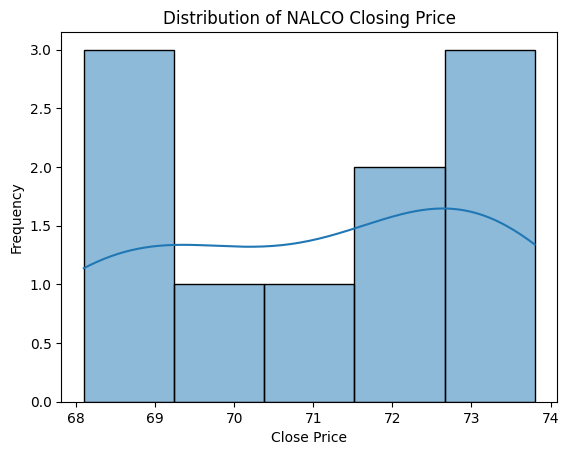

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(df["Close"], kde=True)
plt.title("Distribution of NALCO Closing Price")
plt.xlabel("Close Price")
plt.ylabel("Frequency")
plt.show()


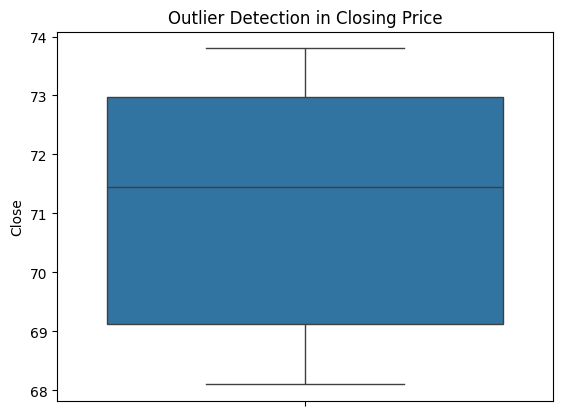

In [9]:
sns.boxplot(y=df["Close"])
plt.title("Outlier Detection in Closing Price")
plt.show()


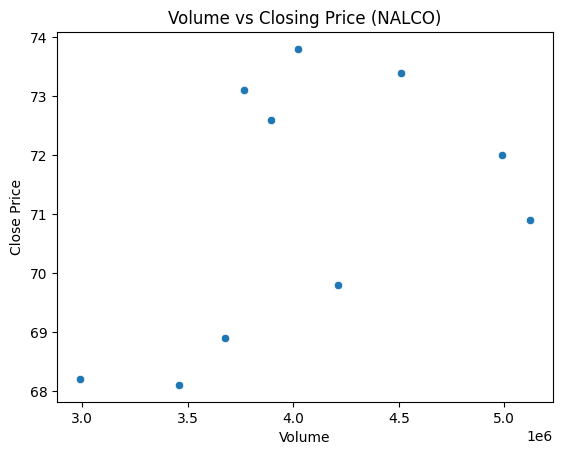

In [10]:
sns.scatterplot(x=df["Volume"], y=df["Close"])
plt.title("Volume vs Closing Price (NALCO)")
plt.xlabel("Volume")
plt.ylabel("Close Price")
plt.show()


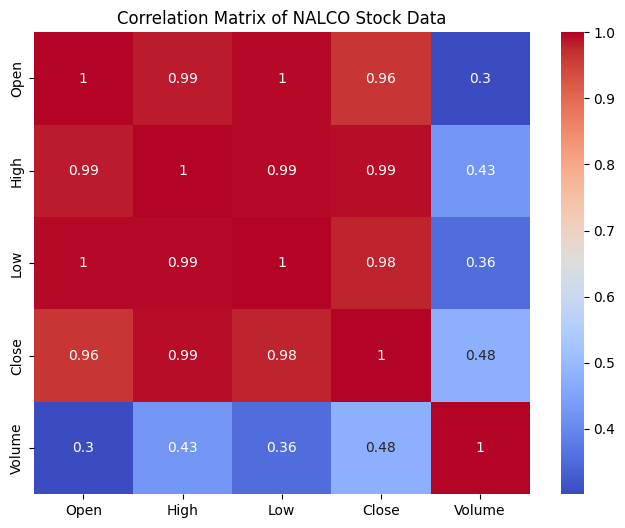

In [17]:
numeric_df = df.select_dtypes(include=["number"])

plt.figure(figsize=(8,6))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix of NALCO Stock Data")
plt.show()



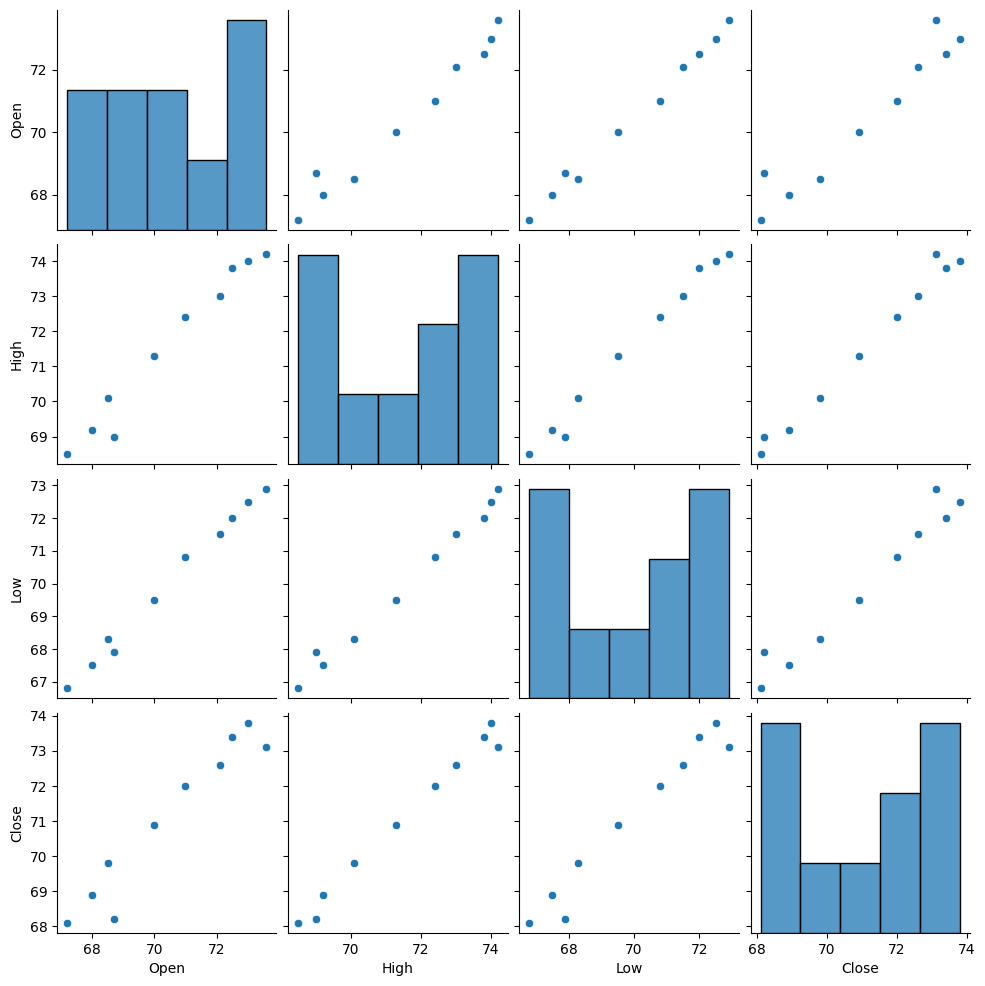

In [12]:
sns.pairplot(df[["Open", "High", "Low", "Close"]])
plt.show()


In [13]:
df.isnull().sum()


Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

In [15]:
# Independent variables (features)
X = df[["Open", "High", "Low", "Volume"]]

# Dependent variable (target)
y = df["Close"]

X.head(), y.head()


(   Open  High   Low   Volume
 0  67.2  68.5  66.8  3456789
 1  68.0  69.2  67.5  3678123
 2  68.7  69.0  67.9  2987456
 3  68.5  70.1  68.3  4210987
 4  70.0  71.3  69.5  5123980,
 0    68.1
 1    68.9
 2    68.2
 3    69.8
 4    70.9
 Name: Close, dtype: float64)

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

X_train.shape, X_test.shape


((8, 4), (2, 4))

In [18]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)


,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [19]:
y_pred = model.predict(X_test)

y_test.values, y_pred


(array([73.1, 68.9]), array([73.74977886, 68.74506059]))

In [20]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

print("MSE:", mean_squared_error(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))


MSE: 0.2231093939660955
MAE: 0.40235913550246494
R2 Score: 0.9494083006879599


In [21]:
print("Training Score:", model.score(X_train, y_train))
print("Testing Score:", model.score(X_test, y_test))


Training Score: 0.9987835824828473
Testing Score: 0.9494083006879599


In [22]:
# Create Price Movement column
df["Price_Movement"] = (df["Close"] > df["Open"]).astype(int)

df[["Open", "Close", "Price_Movement"]].head()


,Open,Close,Price_Movement
0,67.2,68.1,1
1,68.0,68.9,1
2,68.7,68.2,0
3,68.5,69.8,1
4,70.0,70.9,1


In [23]:
X_cls = df[["Open", "High", "Low", "Volume"]]
y_cls = df["Price_Movement"]

X_cls.head(), y_cls.head()


(   Open  High   Low   Volume
 0  67.2  68.5  66.8  3456789
 1  68.0  69.2  67.5  3678123
 2  68.7  69.0  67.9  2987456
 3  68.5  70.1  68.3  4210987
 4  70.0  71.3  69.5  5123980,
 0    1
 1    1
 2    0
 3    1
 4    1
 Name: Price_Movement, dtype: int64)

In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_cls, y_cls, test_size=0.2, random_state=42
)


In [25]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()
clf.fit(X_train, y_train)


,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",None
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`mul

In [26]:
y_pred_cls = clf.predict(X_test)

y_test.values, y_pred_cls


(array([0, 1]), array([1, 1]))

In [27]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print("Accuracy:", accuracy_score(y_test, y_pred_cls))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_cls))
print("Classification Report:\n", classification_report(y_test, y_pred_cls))


Accuracy: 0.5
Confusion Matrix:
 [[0 1]
 [0 1]]
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.50      1.00      0.67         1

    accuracy                           0.50         2
   macro avg       0.25      0.50      0.33         2
weighted avg       0.25      0.50      0.33         2



/usr/local/python/3.12.1/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/usr/local/python/3.12.1/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/usr/local/python/3.12.1/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape

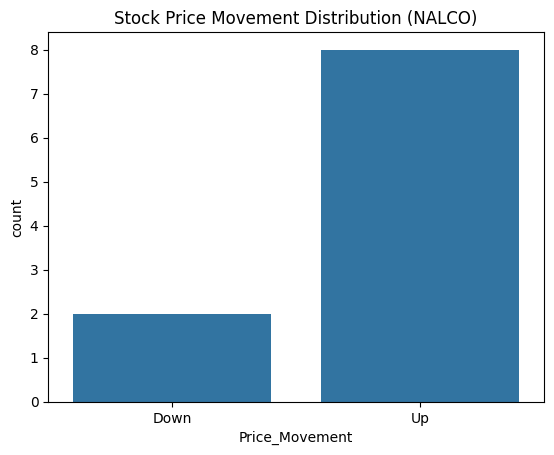

In [28]:
sns.countplot(x="Price_Movement", data=df)
plt.title("Stock Price Movement Distribution (NALCO)")
plt.xticks([0,1], ["Down", "Up"])
plt.show()
